In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from GIR.GIR import *
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Testing the Generalised Impulse-Response modelling framework

GIR is available to download on Nick Leach's github.
https://github.com/njleach/GIR

Check out the example notebook for further instructions on using GIR.
https://github.com/njleach/GIR/blob/master/GIR/GIR_example_notebook.ipynb

In [3]:
## Get dependencies ##

import numpy as np
import string
import math
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sn
import scipy as sp
import pickle
import time
import scipy as sp
from scipy import ndimage
from scipy import signal
import os
from difflib import SequenceMatcher
import statsmodels.api as sm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## Model Information

### Emissions Input Format
Emissions Input format is critical for correct operation:

In [4]:
# The following function returns an empty dataframe in the correct format for use in GIR.

test_emissions = return_empty_emissions(df_to_copy=False, start_year=0, end_year=100, timestep=1, scen_names=['Test'], gases_in = ['CO2','CH4','N2O'])

# Although here we demonstrate using GIR in emissions driven mode, an identical format dataframe is used for concentrations driven mode.

# create an empty forcing dataframe compatible with test_emissions:

test_forcing = return_empty_forcing(test_emissions)

# Generate a default parameter dataframe:

test_gas_parameters = get_gas_parameter_defaults()

test_thermal_parameters = get_thermal_parameter_defaults()

test_thermal_parameters
# empty_run = run_GIR(emissions_in=test_emissions)
# empty_run['T']
# test_emissions.head()

Thermal_param_set     default                 
Box                         1         2      3
param_name                                    
d                  283.000000  9.880000  0.850
q                    0.311333  0.165417  0.242

In [5]:
# Let's carry out a few basic runs now, starting with pulse emissions for each gas.

# First generate an empty emissions dataframe with four different scenarios

pulse_emissions = return_empty_emissions(df_to_copy=False, start_year=0, end_year=100, timestep=1, scen_names=['None']+[x+'pulse' for x in ['CO2','CH4','N2O']], gases_in = ['CO2','CH4','N2O'])

# add pulses in year 10 (the units are GtC, MtCH4 and MtN2O-N2):

# for gas in ['CO2','CH4','N2O']:
    
pulse_emissions.loc[10,('CO2'+'pulse','CO2')] += 10
    
# Now generate a compatible forcing dataframe:

pulse_forcing = return_empty_forcing(pulse_emissions)

# And run the model!

pulse_run = run_GIR(emissions_in=pulse_emissions,forcing_in=pulse_forcing)
pulse_run['T']

Integrating 4 scenarios, 1 gas cycle parameter sets, 1 independent thermal response parameter sets, over ['CH4', 'CO2', 'N2O'], between 0.0 and 100.0...


Scenario,CH4pulse,CO2pulse,N2Opulse,None
Parameter set,default,default,default,default
Year,,,,
0.0,0.0,0.000000,0.0,0.0
1.0,0.0,0.000000,0.0,0.0
2.0,0.0,0.000000,0.0,0.0
3.0,0.0,0.000000,0.0,0.0
4.0,0.0,0.000000,0.0,0.0
5.0,0.0,0.000000,0.0,0.0
6.0,0.0,0.000000,0.0,0.0
7.0,0.0,0.000000,0.0,0.0


# Data Download

In [6]:
# Load multigas PRIMAP emissions data from excel
GlobalMultigasEms = pd.read_excel (
    r'Graphs/GraphData.xlsx', 
    sheet_name='Global Multigas Emissions')[['Year','CO2','CH4','N2O']].set_index('Year')

UKMultigasEms = pd.read_excel (
    r'Graphs/GraphData.xlsx', 
    sheet_name='UK Multigas Emissions')[['Year','CO2','CH4','N2O']].set_index('Year')

# Load metric CO2 emissions data from excel
GlobalMetricEms = pd.read_excel (
    r'Graphs/MetricEmissionsData.xlsx', 
    sheet_name='Global Methane Metric Emissions')[['Year','SLCP Emissions','CO2feEms','CO2we','Old-GWP*','CGWP','CGTP','GWP']].set_index('Year')

UKMetricEms = pd.read_excel (
    r'Graphs/MetricEmissionsData.xlsx', 
    sheet_name='UK Methane Metric Emissions')[['Year','SLCP Emissions','CO2feEms','CO2we','Old-GWP*','CGWP','CGTP','GWP']].set_index('Year')


# Load multigas RCP emissions data from excel
RCP26Ems = pd.read_excel (
    r'RCP Data/RCPMetricData.xlsx', 
    sheet_name='RCP 26 Metric Emissions')[['Year','CO2','CH4','N2O','SLCP Emissions','CO2feEms','CO2we','Old-GWP*','CGWP','CGTP','GWP']].set_index('Year')

RCP45Ems = pd.read_excel (
    r'RCP Data/RCPMetricData.xlsx', 
    sheet_name='RCP 45 Metric Emissions')[['Year','CO2','CH4','N2O','SLCP Emissions','CO2feEms','CO2we','Old-GWP*','CGWP','CGTP','GWP']].set_index('Year')

RCP60Ems = pd.read_excel (
    r'RCP Data/RCPMetricData.xlsx', 
    sheet_name='RCP 60 Metric Emissions')[['Year','CO2','CH4','N2O','SLCP Emissions','CO2feEms','CO2we','Old-GWP*','CGWP','CGTP','GWP']].set_index('Year')

RCP85Ems = pd.read_excel (
    r'RCP Data/RCPMetricData.xlsx', 
    sheet_name='RCP 85 Metric Emissions')[['Year','CO2','CH4','N2O','SLCP Emissions','CO2feEms','CO2we','Old-GWP*','CGWP','CGTP','GWP']].set_index('Year')


# Load CH4 Step-change emissions from excel
UnconvertedStepTestEms = pd.read_excel (
    r'Graphs/StepCH4Data.xlsx', 
    sheet_name='CO2-equivalent-emissions').set_index('Year')

In [7]:
# Create Dataframe for Combined Metric and CH4 emissions
# Global
GlobalEms = pd.concat([GlobalMetricEms,GlobalMultigasEms],axis=1)

# UK
UKEms = pd.concat([UKMetricEms,UKMultigasEms],axis=1)

In [8]:
# Convert to the correct units for GIR input: GtC, MtCH4, MtN2
K = 1000
GIRConversionCO2 = 1/K * 12.0107/44.0095 # Convert MtCO2 -> GtC
GIRConversionCH4 = 1
GIRConversionN2O = 28.0134/44.013 # Convert MtN2O -> MtN2

GlobalEms[['CO2','CO2feEms','CO2we','Old-GWP*','CGWP','CGTP','GWP']] = GIRConversionCO2 * GlobalEms[['CO2','CO2feEms','CO2we','Old-GWP*','CGWP','CGTP','GWP']]
GlobalEms[['SLCP Emissions','CH4']] = GIRConversionCH4 * GlobalEms[['SLCP Emissions','CH4']]
GlobalEms[['N2O']] = GIRConversionN2O * GlobalEms[['N2O']]

UKEms[['CO2','CO2feEms','CO2we','Old-GWP*','CGWP','CGTP','GWP']] = GIRConversionCO2 * UKEms[['CO2','CO2feEms','CO2we','Old-GWP*','CGWP','CGTP','GWP']]
UKEms[['SLCP Emissions','CH4']] = GIRConversionCH4 * UKEms[['SLCP Emissions','CH4']]
UKEms[['N2O']] = GIRConversionN2O * UKEms[['N2O']]


# RCP Emissions
RCP26Emissions = GIRConversionCO2 * RCP26Ems[['CO2','CO2feEms','CO2we','Old-GWP*','CGWP','CGTP','GWP']]
RCP26Emissions[['SLCP Emissions','CH4']] = GIRConversionCH4 * RCP26Ems[['SLCP Emissions','CH4']]
RCP26Emissions[['N2O']] = GIRConversionN2O * RCP26Ems[['N2O']]

RCP45Emissions = GIRConversionCO2 * RCP45Ems[['CO2','CO2feEms','CO2we','Old-GWP*','CGWP','CGTP','GWP']]
RCP45Emissions[['SLCP Emissions','CH4']] = GIRConversionCH4 * RCP45Ems[['SLCP Emissions','CH4']]
RCP45Emissions[['N2O']] = GIRConversionN2O * RCP45Ems[['N2O']]

RCP60Emissions = GIRConversionCO2 * RCP60Ems[['CO2','CO2feEms','CO2we','Old-GWP*','CGWP','CGTP','GWP']]
RCP60Emissions[['SLCP Emissions','CH4']] = GIRConversionCH4 * RCP60Ems[['SLCP Emissions','CH4']]
RCP60Emissions[['N2O']] = GIRConversionN2O * RCP60Ems[['N2O']]

RCP85Emissions = GIRConversionCO2 * RCP85Ems[['CO2','CO2feEms','CO2we','Old-GWP*','CGWP','CGTP','GWP']]
RCP85Emissions[['SLCP Emissions','CH4']] = GIRConversionCH4 * RCP85Ems[['SLCP Emissions','CH4']]
RCP85Emissions[['N2O']] = GIRConversionN2O * RCP85Ems[['N2O']]


# Step Test Emissions
StepTestEms = GIRConversionCO2 * UnconvertedStepTestEms[['CO2feEms','CO2we','Old-GWP*','CGWP','CGTP','GWP']]
StepTestEms[['SLCP Emissions']] = GIRConversionCH4 * UnconvertedStepTestEms[['SLCP Emissions']]

# Multi Emissions PRIMAP Run

## Methane only temp responses

i.e. the warming were ONLY methane emissions present

### Methane only temp response - Global

In [260]:
# Create empty emissions dataframe with the corrects scenario names
# pulse_emissions = return_empty_emissions(df_to_copy=False, start_year=1851, end_year=2017, timestep=1, scen_names=[x for x in GlobalEms.drop(['Year'], axis=1).columns], gases_in = ['CO2','CH4','N2O'])
GIRGlobalCH4Ems = return_empty_emissions(df_to_copy=False, start_year=1500, end_year=2017, timestep=1, scen_names=[x for x in GlobalEms.columns], gases_in = ['CO2','CH4','N2O'])

# Add emissions to the dataframe, N.B. GIR CO2 inputs are in Gt, CH4 and N2O in Mt
K = 1000

GIRGlobalCH4Ems['SLCP Emissions','CH4'] = GlobalEms['SLCP Emissions']
GIRGlobalCH4Ems['CO2feEms','CO2'] = GlobalEms['CO2feEms'] 
GIRGlobalCH4Ems['CO2we','CO2'] = GlobalEms['CO2we'] 
GIRGlobalCH4Ems['Old-GWP*','CO2'] = GlobalEms['Old-GWP*'] 
GIRGlobalCH4Ems['CGWP','CO2'] = GlobalEms['CGWP'] 
GIRGlobalCH4Ems['CGTP','CO2'] = GlobalEms['CGTP'] 
GIRGlobalCH4Ems['GWP','CO2'] = GlobalEms['GWP'] 
GIRGlobalCH4Ems = GIRGlobalCH4Ems


GIRGlobalCH4Ems.head()


Scenario SLCP Emissions                CO2feEms             CO2we          \
Gas                 CO2       CH4 N2O       CO2 CH4 N2O       CO2 CH4 N2O   
Year                                                                        
1500.0                0  24.58113   0  0.806724   0   0  0.751349   0   0   
1501.0                0  24.58113   0  0.776025   0   0  0.751349   0   0   
1502.0                0  24.58113   0  0.742214   0   0  0.751349   0   0   
1503.0                0  24.58113   0  0.706555   0   0  0.751349   0   0   
1504.0                0  24.58113   0  0.670035   0   0  0.751349   0   0   

Scenario   Old-GWP*  ... GWP CO2         CH4         N2O          
Gas             CO2  ... N2O CO2 CH4 N2O CO2 CH4 N2O CO2 CH4 N2O  
Year                 ...                                          
1500.0    18.783727  ...   0   0   0   0   0   0   0   0   0   0  
1501.0     0.000000  ...   0   0   0   0   0   0   0   0   0   0  
1502.0     0.000000  ...   0   0   0   0   0   0   0   0   0   0  
1503.0     0.000000  ...   0   0   0   0   0   0   0   0   0   0  
1504.0     0.000000  ...   0   0   0   0   0   0   0   0   0   0  

[5 rows x 30 columns]

In [261]:
GlobalCH4EmsGIROutput = run_GIR(emissions_in=GIRGlobalCH4Ems)
GlobalCH4EmsGIROutput['T'].tail()

Integrating 10 scenarios, 1 gas cycle parameter sets, 1 independent thermal response parameter sets, over ['CH4', 'CO2', 'N2O'], between 1500.0 and 2017.0...


Scenario,CGTP,CGWP,CH4,CO2,CO2feEms,CO2we,GWP,N2O,Old-GWP*,SLCP Emissions
Parameter set,default,default,default,default,default,default,default,default,default,default
Year,,,,,,,,,,
2013.0,0.420388,0.488757,0.0,0.0,0.251039,0.297318,0.316709,0.0,0.317750,0.270721
2014.0,0.421569,0.490205,0.0,0.0,0.253229,0.299557,0.319893,0.0,0.318566,0.272795
2015.0,0.424294,0.493399,0.0,0.0,0.255419,0.301878,0.323098,0.0,0.320594,0.274873
2016.0,0.429694,0.499659,0.0,0.0,0.257697,0.304311,0.326343,0.0,0.324690,0.277011
2017.0,0.435942,0.506904,0.0,0.0,0.260087,0.306906,0.329636,0.0,0.329431,0.279231


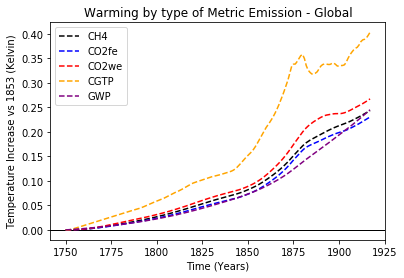

In [262]:
# Plot of emission driven warming: Global

t = GlobalCH4EmsGIROutput['T'].index[250:418]
y = GlobalCH4EmsGIROutput['T']['SLCP Emissions'][1850:2017]
s = GlobalCH4EmsGIROutput['T']['CO2feEms'][1850:2017]
u = GlobalCH4EmsGIROutput['T']['CO2we'][1850:2017]
v = GlobalCH4EmsGIROutput['T']['Old-GWP*'][1850:2017]
w = GlobalCH4EmsGIROutput['T']['CGWP'][1850:2017]
z = GlobalCH4EmsGIROutput['T']['CGTP'][1850:2017]
x = GlobalCH4EmsGIROutput['T']['GWP'][1850:2017]

y = y - y.loc[1850]
s = s - s.loc[1850]
u = u - u.loc[1850]
v = v - v.loc[1850]
w = w - w.loc[1850]
z = z - z.loc[1850]
x = x - x.loc[1850]


fig, (ax) = plt.subplots()
ax.axhline(linewidth=1,color='black')


ax.set(xlabel='Time (Years)', ylabel='Temperature Increase vs 1853 (Kelvin)',
       title='Warming by type of Metric Emission - Global')
# ax.grid()

# red_patch = mpatches.Patch(color='red', label='Agriculture')
# plt.legend(handles=[red_patch])

plt.plot(t, y, '--', color="black", label = 'CH4')
plt.plot(t, s, '--', color="blue", label = 'CO2fe')
plt.plot(t, u, '--', color="red", label = 'CO2we')
# plt.plot(t, v, '--', color="green", label = 'OldGWP*')
# plt.plot(t, w, '--', color="orange", label = 'CGWP')
plt.plot(t, z, '--', color="orange", label = 'CGTP')
plt.plot(t, x, '--', color="purple", label = 'GWP')

ax.legend()

plt.savefig('Graphs/CH4 only warming by type of Metric Emission - Global.png', dpi=500)

### Methane only temp response - UK

In [263]:
# Create empty emissions dataframe with the corrects scenario names
# pulse_emissions = return_empty_emissions(df_to_copy=False, start_year=1851, end_year=2017, timestep=1, scen_names=[x for x in GlobalEms.drop(['Year'], axis=1).columns], gases_in = ['CO2','CH4','N2O'])
GIRUKCH4Ems = return_empty_emissions(df_to_copy=False, start_year=1600, end_year=2017, timestep=1, scen_names=[x for x in UKEms.columns], gases_in = ['CO2','CH4','N2O'])

# Add emissions to the dataframe, N.B. GIR CO2 inputs are in Gt, CH4 and N2O in Mt
K = 1000

GIRUKCH4Ems['SLCP Emissions','CH4'] = UKEms['SLCP Emissions']
GIRUKCH4Ems['CO2feEms','CO2'] = UKEms['CO2feEms'] 
GIRUKCH4Ems['CO2we','CO2'] = UKEms['CO2we'] 
GIRUKCH4Ems['Old-GWP*','CO2'] = UKEms['Old-GWP*'] 
GIRUKCH4Ems['CGWP','CO2'] = UKEms['CGWP'] 
GIRUKCH4Ems['CGTP','CO2'] = UKEms['CGTP'] 
GIRUKCH4Ems['GWP','CO2'] = UKEms['GWP'] 


GIRUKCH4Ems.head()


Scenario SLCP Emissions                CO2feEms             CO2we          \
Gas                 CO2       CH4 N2O       CO2 CH4 N2O       CO2 CH4 N2O   
Year                                                                        
1600.0                0  1.295084   0  0.002300   0   0  0.002474   0   0   
1601.0                0  1.295084   0  0.002279   0   0  0.002474   0   0   
1602.0                0  1.295084   0  0.002258   0   0  0.002474   0   0   
1603.0                0  1.295084   0  0.002237   0   0  0.002474   0   0   
1604.0                0  1.295084   0  0.002217   0   0  0.002474   0   0   

Scenario Old-GWP*  ... GWP CO2         CH4         N2O          
Gas           CO2  ... N2O CO2 CH4 N2O CO2 CH4 N2O CO2 CH4 N2O  
Year               ...                                          
1600.0        0.0  ...   0   0   0   0   0   0   0   0   0   0  
1601.0        0.0  ...   0   0   0   0   0   0   0   0   0   0  
1602.0        0.0  ...   0   0   0   0   0   0   0   0   0   0  
1603.0        0.0  ...   0   0   0   0   0   0   0   0   0   0  
1604.0        0.0  ...   0   0   0   0   0   0   0   0   0   0  

[5 rows x 30 columns]

In [264]:
UKCH4EmsGIROutput = run_GIR(emissions_in=GIRUKCH4Ems)
UKCH4EmsGIROutput['T'].tail()

Integrating 10 scenarios, 1 gas cycle parameter sets, 1 independent thermal response parameter sets, over ['CH4', 'CO2', 'N2O'], between 1600.0 and 2017.0...


Scenario,CGTP,CGWP,CH4,CO2,CO2feEms,CO2we,GWP,N2O,Old-GWP*,SLCP Emissions
Parameter set,default,default,default,default,default,default,default,default,default,default
Year,,,,,,,,,,
2013.0,0.000172,0.000200,0.0,0.0,0.003216,0.003956,0.009978,0.0,1.297708e-04,0.005554
2014.0,0.000001,0.000002,0.0,0.0,0.003120,0.003826,0.009992,0.0,8.753691e-07,0.005434
2015.0,-0.000133,-0.000154,0.0,0.0,0.003025,0.003698,0.010004,0.0,-1.004300e-04,0.005315
2016.0,-0.000203,-0.000236,0.0,0.0,0.002934,0.003570,0.010016,0.0,-1.539027e-04,0.005200
2017.0,-0.000238,-0.000277,0.0,0.0,0.002848,0.003443,0.010027,0.0,-1.803463e-04,0.005089


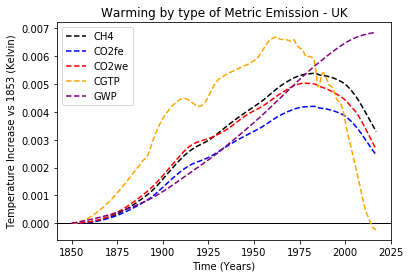

In [265]:
# Plot of emission driven warming: Global

t = UKCH4EmsGIROutput['T'].index[250:418]
y = UKCH4EmsGIROutput['T']['SLCP Emissions'][1850:2017]
s = UKCH4EmsGIROutput['T']['CO2feEms'][1850:2017]
u = UKCH4EmsGIROutput['T']['CO2we'][1850:2017]
v = UKCH4EmsGIROutput['T']['Old-GWP*'][1850:2017]
w = UKCH4EmsGIROutput['T']['CGWP'][1850:2017]
z = UKCH4EmsGIROutput['T']['CGTP'][1850:2017]
x = UKCH4EmsGIROutput['T']['GWP'][1850:2017]

y = y - y.loc[1850]
s = s - s.loc[1850]
u = u - u.loc[1850]
v = v - v.loc[1850]
w = w - w.loc[1850]
z = z - z.loc[1850]
x = x - x.loc[1850]


fig, (ax) = plt.subplots()
ax.axhline(linewidth=1,color='black')


ax.set(xlabel='Time (Years)', ylabel='Temperature Increase vs 1853 (Kelvin)',
       title='Warming by type of Metric Emission - UK')
# ax.grid()

# red_patch = mpatches.Patch(color='red', label='Agriculture')
# plt.legend(handles=[red_patch])

plt.plot(t, y, '--', color="black", label = 'CH4')
plt.plot(t, s, '--', color="blue", label = 'CO2fe')
plt.plot(t, u, '--', color="red", label = 'CO2we')
# plt.plot(t, v, '--', color="green", label = 'OldGWP*')
# plt.plot(t, w, '--', color="orange", label = 'CGWP')
plt.plot(t, z, '--', color="orange", label = 'CGTP')
plt.plot(t, x, '--', color="purple", label = 'GWP')

ax.legend()

plt.savefig('Graphs/CH4 only warming by type of Metric Emission - UK.png', dpi=500)

## Delta from Global MultiGas Emissions

i.e. the warming that can be attributed to the methane emissions

We need to get total warming multigas, total warming from non methane emissions, and total warming from non methane emissions plus metric emissinos for the methane

In [266]:
# Warming from all emissions - Multigas

Columns = ['Multigas','Multigas - CH4','Multigas - CH4 + CO2feEms','Multigas - CH4 + CO2we','Multigas - CH4 + Old-GWP*','Multigas - CH4 + CGWP','Multigas - CH4 + CGTP','Multigas - CH4 + GWP']

GIRGlobalEms = return_empty_emissions(df_to_copy=False, start_year=1600, end_year=2017, timestep=1, scen_names=[x for x in Columns], gases_in = ['CO2','CH4','N2O'])
GIRUKEms= return_empty_emissions(df_to_copy=False, start_year=1600, end_year=2017, timestep=1, scen_names=[x for x in Columns], gases_in = ['CO2','CH4','N2O'])

### Delta methane response - Global

In [267]:
# Populate input emissions table with emissions data:

GIRGlobalEms['Multigas','CO2'] = GlobalEms['CO2'] 
GIRGlobalEms['Multigas','CH4'] = GlobalEms['CH4']
GIRGlobalEms['Multigas','N2O'] = GlobalEms['N2O']

GIRGlobalEms['Multigas - CH4','CO2'] = GlobalEms['CO2'] 
GIRGlobalEms['Multigas - CH4','CH4'] = 0
GIRGlobalEms['Multigas - CH4','N2O'] = GlobalEms['N2O']

GIRGlobalEms['Multigas - CH4 + CO2feEms','CO2'] = GlobalEms['CO2'].add(GlobalEms['CO2feEms'])
GIRGlobalEms['Multigas - CH4 + CO2feEms','CH4'] = 0
GIRGlobalEms['Multigas - CH4 + CO2feEms','N2O'] = GlobalEms['N2O']

GIRGlobalEms['Multigas - CH4 + CO2we','CO2'] = GlobalEms['CO2'].add(GlobalEms['CO2we'])
GIRGlobalEms['Multigas - CH4 + CO2we','CH4'] = 0
GIRGlobalEms['Multigas - CH4 + CO2we','N2O'] = GlobalEms['N2O']

GIRGlobalEms['Multigas - CH4 + Old-GWP*','CO2'] = GlobalEms['CO2'].add(GlobalEms['Old-GWP*']) 
GIRGlobalEms['Multigas - CH4 + Old-GWP*','CH4'] = 0
GIRGlobalEms['Multigas - CH4 + Old-GWP*','N2O'] = GlobalEms['N2O']

GIRGlobalEms['Multigas - CH4 + CGWP','CO2'] = GlobalEms['CO2'].add(GlobalEms['CGWP'])
GIRGlobalEms['Multigas - CH4 + CGWP','CH4'] = 0
GIRGlobalEms['Multigas - CH4 + CGWP','N2O'] = GlobalEms['N2O']

GIRGlobalEms['Multigas - CH4 + CGTP','CO2'] = GlobalEms['CO2'].add(GlobalEms['CGTP'])
GIRGlobalEms['Multigas - CH4 + CGTP','CH4'] = 0
GIRGlobalEms['Multigas - CH4 + CGTP','N2O'] = GlobalEms['N2O']

GIRGlobalEms['Multigas - CH4 + GWP','CO2'] = GlobalEms['CO2'].add(GlobalEms['GWP'])
GIRGlobalEms['Multigas - CH4 + GWP','CH4'] = 0
GIRGlobalEms['Multigas - CH4 + GWP','N2O'] = GlobalEms['N2O']

In [268]:
GIRGlobalEms = GIRGlobalEms.fillna(0)
GlobalEmsGIROutput = run_GIR(emissions_in=GIRGlobalEms)

Integrating 8 scenarios, 1 gas cycle parameter sets, 1 independent thermal response parameter sets, over ['CH4', 'CO2', 'N2O'], between 1600.0 and 2017.0...


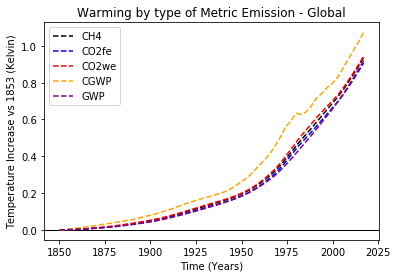

In [269]:
# Plot of emission driven warming, Multigas vs Metric: Global

t = GlobalEmsGIROutput['T'].index[250:418]
y = GlobalEmsGIROutput['T']['Multigas'][1850:2017]
s = GlobalEmsGIROutput['T']['Multigas - CH4 + CO2feEms'][1850:2017]
u = GlobalEmsGIROutput['T']['Multigas - CH4 + CO2we'][1850:2017]
v = GlobalEmsGIROutput['T']['Multigas - CH4 + Old-GWP*'][1850:2017]
w = GlobalEmsGIROutput['T']['Multigas - CH4 + CGWP'][1850:2017]
z = GlobalEmsGIROutput['T']['Multigas - CH4 + CGTP'][1850:2017]
x = GlobalEmsGIROutput['T']['Multigas - CH4 + GWP'][1850:2017]

# set to zero at year 1850

y = y - y.loc[1850]
s = s - s.loc[1850]
u = u - u.loc[1850]
v = v - v.loc[1850]
w = w - w.loc[1850]
z = z - z.loc[1850]
x = x - x.loc[1850]

fig, (ax) = plt.subplots()
ax.axhline(linewidth=1,color='black')


ax.set(xlabel='Time (Years)', ylabel='Temperature Increase vs 1853 (Kelvin)',
       title='Warming by type of Metric Emission - Global')


plt.plot(t, y, '--', color="black", label = 'CH4')
plt.plot(t, s, '--', color="blue", label = 'CO2fe')
plt.plot(t, u, '--', color="red", label = 'CO2we')
# plt.plot(t, v, '--', color="green", label = 'OldGWP*')
# plt.plot(t, w, '--', color="orange", label = 'CGWP')
plt.plot(t, z, '--', color="orange", label = 'CGWP')
plt.plot(t, x, '--', color="purple", label = 'GWP')

ax.legend()

plt.savefig('Graphs/Warming by type of Metric Emission - Global.png', dpi=500)

CO2fe RMSDeviation: Parameter set
default    0.0137
dtype: float64
CO2we RMSDeviation: Parameter set
default    0.00959
dtype: float64
OldGWP* RMSDeviation: Parameter set
default    0.037779
dtype: float64
CGWP RMSDeviation: Parameter set
default    0.117206
dtype: float64
CGTP RMSDeviation: Parameter set
default    0.085047
dtype: float64
GWP RMSDeviation: Parameter set
default    0.018843
dtype: float64


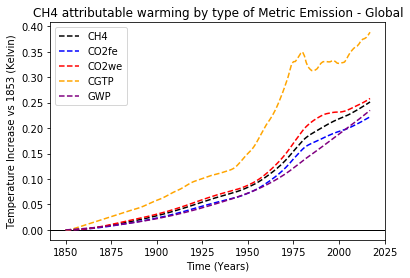

In [270]:
# Plot of CH4 emission driven warming Delta, Multigas and Metric: Global

t = GlobalEmsGIROutput['T'].index[250:418]

y = GlobalEmsGIROutput['T']['Multigas'][1850:2017] - GlobalEmsGIROutput['T']['Multigas - CH4'][1850:2017]
s = GlobalEmsGIROutput['T']['Multigas - CH4 + CO2feEms'][1850:2017] - GlobalEmsGIROutput['T']['Multigas - CH4'][1850:2017]
u = GlobalEmsGIROutput['T']['Multigas - CH4 + CO2we'][1850:2017] - GlobalEmsGIROutput['T']['Multigas - CH4'][1850:2017]
v = GlobalEmsGIROutput['T']['Multigas - CH4 + Old-GWP*'][1850:2017] - GlobalEmsGIROutput['T']['Multigas - CH4'][1850:2017]
w = GlobalEmsGIROutput['T']['Multigas - CH4 + CGWP'][1850:2017] - GlobalEmsGIROutput['T']['Multigas - CH4'][1850:2017]
z = GlobalEmsGIROutput['T']['Multigas - CH4 + CGTP'][1850:2017] - GlobalEmsGIROutput['T']['Multigas - CH4'][1850:2017]
x = GlobalEmsGIROutput['T']['Multigas - CH4 + GWP'][1850:2017] - GlobalEmsGIROutput['T']['Multigas - CH4'][1850:2017]

# set to zero at year 1850

y = y - y.loc[1850]
s = s - s.loc[1850]
u = u - u.loc[1850]
v = v - v.loc[1850]
w = w - w.loc[1850]
z = z - z.loc[1850]
x = x - x.loc[1850]

fig, (ax) = plt.subplots()
ax.axhline(linewidth=1,color='black')


ax.set(xlabel='Time (Years)', ylabel='Temperature Increase vs 1853 (Kelvin)',
       title='CH4 attributable warming by type of Metric Emission - Global')
# ax.grid()

# red_patch = mpatches.Patch(color='red', label='Agriculture')
# plt.legend(handles=[red_patch])

plt.plot(t, y, '--', color="black", label = 'CH4')
plt.plot(t, s, '--', color="blue", label = 'CO2fe')
plt.plot(t, u, '--', color="red", label = 'CO2we')
# plt.plot(t, v, '--', color="green", label = 'OldGWP*')
# plt.plot(t, w, '--', color="orange", label = 'CGWP')
plt.plot(t, z, '--', color="orange", label = 'CGTP')
plt.plot(t, x, '--', color="purple", label = 'GWP')

ax.legend()

plt.savefig('Graphs/CH4 attributable warming by type of Metric Emission - Global.png', dpi=500)

# Calculate RMS deviation between CH4 and Metric Temp Impacts

sDiff = s - y
uDiff = u - y
vDiff = v - y
wDiff = w - y
zDiff = z - y
xDiff = x - y

sRMS = np.sqrt((sDiff**2).sum(axis = 0, skipna = True)/(2017-1850))
uRMS = np.sqrt((uDiff**2).sum(axis = 0, skipna = True)/(2017-1850))
vRMS = np.sqrt((vDiff**2).sum(axis = 0, skipna = True)/(2017-1850))
wRMS = np.sqrt((wDiff**2).sum(axis = 0, skipna = True)/(2017-1850))
zRMS = np.sqrt((zDiff**2).sum(axis = 0, skipna = True)/(2017-1850))
xRMS = np.sqrt((xDiff**2).sum(axis = 0, skipna = True)/(2017-1850))

print('CO2fe RMSDeviation:', sRMS)
print('CO2we RMSDeviation:', uRMS)
print('OldGWP* RMSDeviation:', vRMS)
print('CGWP RMSDeviation:', wRMS)
print('CGTP RMSDeviation:', zRMS)
print('GWP RMSDeviation:', xRMS)

### Delta methane response - UK

In [271]:
# Populate input emissions table with emissions data:

GIRUKEms['Multigas','CO2'] = GlobalEms['CO2']
GIRUKEms['Multigas','CH4'] = GlobalEms['CH4']
GIRUKEms['Multigas','N2O'] = GlobalEms['N2O']

GIRUKEms['Multigas - CH4','CO2'] = GlobalEms['CO2']
GIRUKEms['Multigas - CH4','CH4'] = GlobalEms['CH4'].sub(UKEms['CH4'])
GIRUKEms['Multigas - CH4','N2O'] = GlobalEms['N2O']

GIRUKEms['Multigas - CH4 + CO2feEms','CO2'] = GlobalEms['CO2'].add(UKEms['CO2feEms'])
GIRUKEms['Multigas - CH4 + CO2feEms','CH4'] = GlobalEms['CH4'].sub(UKEms['CH4'])
GIRUKEms['Multigas - CH4 + CO2feEms','N2O'] = GlobalEms['N2O']

GIRUKEms['Multigas - CH4 + CO2we','CO2'] = GlobalEms['CO2'].add(UKEms['CO2we'])
GIRUKEms['Multigas - CH4 + CO2we','CH4'] = GlobalEms['CH4'].sub(UKEms['CH4'])
GIRUKEms['Multigas - CH4 + CO2we','N2O'] = GlobalEms['N2O']

GIRUKEms['Multigas - CH4 + Old-GWP*','CO2'] = GlobalEms['CO2'].add(UKEms['Old-GWP*'])
GIRUKEms['Multigas - CH4 + Old-GWP*','CH4'] = GlobalEms['CH4'].sub(UKEms['CH4'])
GIRUKEms['Multigas - CH4 + Old-GWP*','N2O'] = GlobalEms['N2O']

GIRUKEms['Multigas - CH4 + CGWP','CO2'] = GlobalEms['CO2'].add(UKEms['CGWP'])
GIRUKEms['Multigas - CH4 + CGWP','CH4'] = GlobalEms['CH4'].sub(UKEms['CH4'])
GIRUKEms['Multigas - CH4 + CGWP','N2O'] = GlobalEms['N2O']

GIRUKEms['Multigas - CH4 + CGTP','CO2'] = GlobalEms['CO2'].add(UKEms['CGTP'])
GIRUKEms['Multigas - CH4 + CGTP','CH4'] = GlobalEms['CH4'].sub(UKEms['CH4'])
GIRUKEms['Multigas - CH4 + CGTP','N2O'] = GlobalEms['N2O']

GIRUKEms['Multigas - CH4 + GWP','CO2'] = GlobalEms['CO2'].add(UKEms['GWP'])
GIRUKEms['Multigas - CH4 + GWP','CH4'] = GlobalEms['CH4'].sub(UKEms['CH4'])
GIRUKEms['Multigas - CH4 + GWP','N2O'] = GlobalEms['N2O']

GIRUKEms.head()

Scenario  Multigas                      Multigas - CH4                       \
Gas            CO2        CH4       N2O            CO2        CH4       N2O   
Year                                                                          
1600.0    0.060963  23.940987  0.221881       0.060963  22.653913  0.221881   
1601.0    0.060963  23.940987  0.221881       0.060963  22.653913  0.221881   
1602.0    0.060963  23.940987  0.221881       0.060963  22.653913  0.221881   
1603.0    0.060963  23.940987  0.221881       0.060963  22.653913  0.221881   
1604.0    0.060963  23.940987  0.221881       0.060963  22.653913  0.221881   

Scenario Multigas - CH4 + CO2feEms                       \
Gas                            CO2        CH4       N2O   
Year                                                      
1600.0                    0.063264  22.653913  0.221881   
1601.0                    0.063242  22.653913  0.221881   
1602.0                    0.063221  22.653913  0.221881   
1603.0                    0.063200  22.653913  0.221881   
1604.0                    0.063180  22.653913  0.221881   

Scenario Multigas - CH4 + CO2we  ... Multigas - CH4 + Old-GWP*  \
Gas                         CO2  ...                       N2O   
Year                             ...                             
1600.0                 0.063437  ...                  0.221881   
1601.0                 0.063437  ...                  0.221881   
1602.0                 0.063437  ...                  0.221881   
1603.0                 0.063437  ...                  0.221881   
1604.0                 0.063437  ...                  0.221881   

Scenario Multigas - CH4 + CGWP                      Multigas - CH4 + CGTP  \
Gas                        CO2        CH4       N2O                   CO2   
Year                                                                        
1600.0                0.060963  22.653913  0.221881              0.060963   
1601.0                0.060963  22.653913  0.221881              0.060963   
1602.0                0.060963  22.653913  0.221881              0.060963   
1603.0                0.060963  22.653913  0.221881              0.060963   
1604.0                0.060963  22.653913  0.221881              0.060963   

Scenario                      Multigas - CH4 + GWP                       
Gas             CH4       N2O                  CO2        CH4       N2O  
Year                                                                     
1600.0    22.653913  0.221881              0.07086  22.653913  0.221881  
1601.0    22.653913  0.221881              0.07086  22.653913  0.221881  
1602.0    22.653913  0.221881              0.07086  22.653913  0.221881  
1603.0    22.653913  0.221881              0.07086  22.653913  0.221881  
1604.0    22.653913  0.221881              0.07086  22.653913  0.221881  

[5 rows x 24 columns]

In [272]:
UKEmsGIROutput = run_GIR(emissions_in=GIRUKEms)
UKEmsGIROutput['T'].tail()

Integrating 8 scenarios, 1 gas cycle parameter sets, 1 independent thermal response parameter sets, over ['CH4', 'CO2', 'N2O'], between 1600.0 and 2017.0...


Scenario,Multigas,Multigas - CH4,Multigas - CH4 + CGTP,Multigas - CH4 + CGWP,Multigas - CH4 + CO2feEms,Multigas - CH4 + CO2we,Multigas - CH4 + GWP,Multigas - CH4 + Old-GWP*
Parameter set,default,default,default,default,default,default,default,default
Year,,,,,,,,
2013.0,0.931507,0.926794,0.927411,0.927511,0.930152,0.930936,0.936758,0.927261
2014.0,0.947780,0.943153,0.943609,0.943684,0.946424,0.947177,0.953131,0.943498
2015.0,0.964144,0.959604,0.959929,0.959982,0.962788,0.963510,0.969593,0.959850
2016.0,0.980620,0.976163,0.976414,0.976455,0.979264,0.979953,0.986165,0.976353
2017.0,0.997227,0.992852,0.993061,0.993095,0.995874,0.996526,1.002866,0.993010


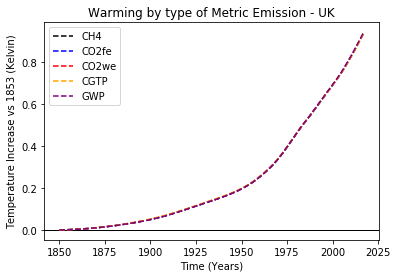

In [273]:
# Plot of emission driven warming, Multigas vs Metric: UK

t = UKEmsGIROutput['T'].index[250:418]
y = UKEmsGIROutput['T']['Multigas'][1850:2017] - UKEmsGIROutput['T']['Multigas'].loc[1850]
s = UKEmsGIROutput['T']['Multigas - CH4 + CO2feEms'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4 + CO2feEms'].loc[1850]
u = UKEmsGIROutput['T']['Multigas - CH4 + CO2we'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4 + CO2we'].loc[1850]
v = UKEmsGIROutput['T']['Multigas - CH4 + Old-GWP*'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4 + Old-GWP*'].loc[1850]
w = UKEmsGIROutput['T']['Multigas - CH4 + CGWP'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4 + CGWP'].loc[1850]
z = UKEmsGIROutput['T']['Multigas - CH4 + CGTP'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4 + CGTP'].loc[1850]
x = UKEmsGIROutput['T']['Multigas - CH4 + GWP'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4 + GWP'].loc[1850]


fig, (ax) = plt.subplots()
ax.axhline(linewidth=1,color='black')


ax.set(xlabel='Time (Years)', ylabel='Temperature Increase vs 1853 (Kelvin)',
       title='Warming by type of Metric Emission - UK')
# ax.grid()

# red_patch = mpatches.Patch(color='red', label='Agriculture')
# plt.legend(handles=[red_patch])

plt.plot(t, y, '--', color="black", label = 'CH4')
plt.plot(t, s, '--', color="blue", label = 'CO2fe')
plt.plot(t, u, '--', color="red", label = 'CO2we')
# plt.plot(t, v, '--', color="green", label = 'OldGWP*')
# plt.plot(t, w, '--', color="orange", label = 'CGWP')
plt.plot(t, z, '--', color="orange", label = 'CGTP')
plt.plot(t, x, '--', color="purple", label = 'GWP')

ax.legend()

plt.savefig('Graphs/Warming by type of Metric Emission - UK.png', dpi=500)

CO2fe RMSDeviation: Parameter set
default    0.000123
dtype: float64
CO2we RMSDeviation: Parameter set
default    0.000529
dtype: float64
OldGWP* RMSDeviation: Parameter set
default    0.00108
dtype: float64
CGWP RMSDeviation: Parameter set
default    0.002545
dtype: float64
CGTP RMSDeviation: Parameter set
default    0.001898
dtype: float64
GWP RMSDeviation: Parameter set
default    0.001354
dtype: float64


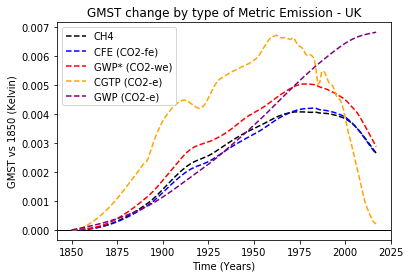

In [335]:
# Plot of emission driven warming, Multigas vs Metric: UK

t = UKEmsGIROutput['T'].index[250:418]

y = UKEmsGIROutput['T']['Multigas'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4'][1850:2017] - UKEmsGIROutput['T']['Multigas'].loc[1850]
s = UKEmsGIROutput['T']['Multigas - CH4 + CO2feEms'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4 + CO2feEms'].loc[1850]
u = UKEmsGIROutput['T']['Multigas - CH4 + CO2we'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4 + CO2we'].loc[1850]
v = UKEmsGIROutput['T']['Multigas - CH4 + Old-GWP*'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4 + Old-GWP*'].loc[1850]
w = UKEmsGIROutput['T']['Multigas - CH4 + CGWP'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4 + CGWP'].loc[1850]
z = UKEmsGIROutput['T']['Multigas - CH4 + CGTP'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4 + CGTP'].loc[1850]
x = UKEmsGIROutput['T']['Multigas - CH4 + GWP'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4'][1850:2017] - UKEmsGIROutput['T']['Multigas - CH4 + GWP'].loc[1850]

# set to zero at year 1850

y = y - y.loc[1850]
s = s - s.loc[1850]
u = u - u.loc[1850]
v = v - v.loc[1850]
w = w - w.loc[1850]
z = z - z.loc[1850]
x = x - x.loc[1850]

fig, (ax) = plt.subplots()
ax.axhline(linewidth=1,color='black')


ax.set(xlabel='Time (Years)', ylabel='GMST vs 1850 (Kelvin)',
       title='GMST change by type of Metric Emission - UK')
# ax.grid()

# red_patch = mpatches.Patch(color='red', label='Agriculture')
# plt.legend(handles=[red_patch])

plt.plot(t, y, '--', color="black", label = 'CH4')
plt.plot(t, s, '--', color="blue", label = 'CFE (CO2-fe)')
plt.plot(t, u, '--', color="red", label = 'GWP* (CO2-we)')
# plt.plot(t, v, '--', color="green", label = 'OldGWP*')
# plt.plot(t, w, '--', color="orange", label = 'CGWP')
plt.plot(t, z, '--', color="orange", label = 'CGTP (CO2-e)')
plt.plot(t, x, '--', color="purple", label = 'GWP (CO2-e)')

ax.legend()

# print(y.loc[2017])
# print(s.loc[2017])

plt.savefig('Graphs/CH4 attributable warming by type of Metric Emission - UK.png', dpi=500)

# Calculate RMS deviation between CH4 and Metric Temp Impacts

sDiff = s - y
uDiff = u - y
vDiff = v - y
wDiff = w - y
zDiff = z - y
xDiff = x - y

sRMS = np.sqrt((sDiff**2).sum(axis = 0, skipna = True)/(2017-1850))
uRMS = np.sqrt((uDiff**2).sum(axis = 0, skipna = True)/(2017-1850))
vRMS = np.sqrt((vDiff**2).sum(axis = 0, skipna = True)/(2017-1850))
wRMS = np.sqrt((wDiff**2).sum(axis = 0, skipna = True)/(2017-1850))
zRMS = np.sqrt((zDiff**2).sum(axis = 0, skipna = True)/(2017-1850))
xRMS = np.sqrt((xDiff**2).sum(axis = 0, skipna = True)/(2017-1850))

print('CO2fe RMSDeviation:', sRMS)
print('CO2we RMSDeviation:', uRMS)
print('OldGWP* RMSDeviation:', vRMS)
print('CGWP RMSDeviation:', wRMS)
print('CGTP RMSDeviation:', zRMS)
print('GWP RMSDeviation:', xRMS)

# Multi Emissions RCP Run

## Generate GIR Input Emissions

In [10]:
# Create empty emissions dataframe with the corrects scenario names
GIRRCP26Emissions = return_empty_emissions(df_to_copy=False, start_year=1765, end_year=2200, timestep=1, scen_names=[x for x in RCP26Emissions.columns], gases_in = ['CO2','CH4','N2O'])
GIRRCP45Emissions = return_empty_emissions(df_to_copy=False, start_year=1765, end_year=2200, timestep=1, scen_names=[x for x in RCP45Emissions.columns], gases_in = ['CO2','CH4','N2O'])
GIRRCP60Emissions = return_empty_emissions(df_to_copy=False, start_year=1765, end_year=2200, timestep=1, scen_names=[x for x in RCP60Emissions.columns], gases_in = ['CO2','CH4','N2O'])
GIRRCP85Emissions = return_empty_emissions(df_to_copy=False, start_year=1765, end_year=2200, timestep=1, scen_names=[x for x in RCP85Emissions.columns], gases_in = ['CO2','CH4','N2O'])


RCP26Emissions.head()



,CO2,CO2feEms,CO2we,Old-GWP*,CGWP,CGTP,GWP,SLCP Emissions,CH4,N2O
Year,,,,,,,,,,
1765,0.003002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1766,0.008344,0.064266,0.060009,1.500231,2.303926,1.982448,0.015002,1.963262,1.963262,0.005192
1767,0.013686,0.077310,0.074473,0.361586,0.555293,0.477810,0.018618,2.436448,2.436448,0.010119
1768,0.019028,0.089564,0.088981,0.362710,0.557019,0.479296,0.022245,2.911105,2.911105,0.015046
1769,0.024370,0.101070,0.103536,0.363869,0.558799,0.480827,0.025884,3.387278,3.387278,0.019973


In [11]:
# Add emissions to the dataframe, N.B. GIR CO2 inputs are in Gt, CH4 and N2O in Mt
K = 1000

# RCP 26
GIRRCP26Emissions['Multigas','CO2'] = RCP26Emissions['CO2']
GIRRCP26Emissions['Multigas','CH4'] = RCP26Emissions['CH4']
GIRRCP26Emissions['Multigas','N2O'] = RCP26Emissions['N2O']

GIRRCP26Emissions['CO2','CO2'] = RCP26Emissions['CO2']
GIRRCP26Emissions['CH4','CH4'] = RCP26Emissions['CH4']
GIRRCP26Emissions['N2O','N2O'] = RCP26Emissions['N2O']

GIRRCP26Emissions['SLCP Emissions','CH4'] = RCP26Emissions['SLCP Emissions']
GIRRCP26Emissions['CO2feEms','CO2'] = RCP26Emissions['CO2feEms'] 
GIRRCP26Emissions['CO2we','CO2'] = RCP26Emissions['CO2we'] 
GIRRCP26Emissions['Old-GWP*','CO2'] = RCP26Emissions['Old-GWP*'] 
GIRRCP26Emissions['CGWP','CO2'] = RCP26Emissions['CGWP'] 
GIRRCP26Emissions['CGTP','CO2'] = RCP26Emissions['CGTP'] 
GIRRCP26Emissions['GWP','CO2'] = RCP26Emissions['GWP'] 

# RCP 45
GIRRCP45Emissions['Multigas','CO2'] = RCP45Emissions['CO2']
GIRRCP45Emissions['Multigas','CH4'] = RCP45Emissions['CH4']
GIRRCP45Emissions['Multigas','N2O'] = RCP45Emissions['N2O']

GIRRCP45Emissions['CO2','CO2'] = RCP45Emissions['CO2']
GIRRCP45Emissions['CH4','CH4'] = RCP45Emissions['CH4']
GIRRCP45Emissions['N2O','N2O'] = RCP45Emissions['N2O']

GIRRCP45Emissions['SLCP Emissions','CH4'] = RCP45Emissions['SLCP Emissions']
GIRRCP45Emissions['CO2feEms','CO2'] = RCP45Emissions['CO2feEms'] 
GIRRCP45Emissions['CO2we','CO2'] = RCP45Emissions['CO2we'] 
GIRRCP45Emissions['Old-GWP*','CO2'] = RCP45Emissions['Old-GWP*'] 
GIRRCP45Emissions['CGWP','CO2'] = RCP45Emissions['CGWP'] 
GIRRCP45Emissions['CGTP','CO2'] = RCP45Emissions['CGTP'] 
GIRRCP45Emissions['GWP','CO2'] = RCP45Emissions['GWP'] 

# RCP 60
GIRRCP60Emissions['Multigas','CO2'] = RCP60Emissions['CO2']
GIRRCP60Emissions['Multigas','CH4'] = RCP60Emissions['CH4']
GIRRCP60Emissions['Multigas','N2O'] = RCP60Emissions['N2O']

GIRRCP60Emissions['CO2','CO2'] = RCP60Emissions['CO2']
GIRRCP60Emissions['CH4','CH4'] = RCP60Emissions['CH4']
GIRRCP60Emissions['N2O','N2O'] = RCP60Emissions['N2O']

GIRRCP60Emissions['SLCP Emissions','CH4'] = RCP60Emissions['SLCP Emissions']
GIRRCP60Emissions['CO2feEms','CO2'] = RCP60Emissions['CO2feEms'] 
GIRRCP60Emissions['CO2we','CO2'] = RCP60Emissions['CO2we'] 
GIRRCP60Emissions['Old-GWP*','CO2'] = RCP60Emissions['Old-GWP*'] 
GIRRCP60Emissions['CGWP','CO2'] = RCP60Emissions['CGWP'] 
GIRRCP60Emissions['CGTP','CO2'] = RCP60Emissions['CGTP'] 
GIRRCP60Emissions['GWP','CO2'] = RCP60Emissions['GWP'] 

# RCP 85
GIRRCP85Emissions['Multigas','CO2'] = RCP85Emissions['CO2']
GIRRCP85Emissions['Multigas','CH4'] = RCP85Emissions['CH4']
GIRRCP85Emissions['Multigas','N2O'] = RCP85Emissions['N2O']

GIRRCP85Emissions['CO2','CO2'] = RCP85Emissions['CO2']
GIRRCP85Emissions['CH4','CH4'] = RCP85Emissions['CH4']
GIRRCP85Emissions['N2O','N2O'] = RCP85Emissions['N2O']

GIRRCP85Emissions['SLCP Emissions','CH4'] = RCP85Emissions['SLCP Emissions']
GIRRCP85Emissions['CO2feEms','CO2'] = RCP85Emissions['CO2feEms'] 
GIRRCP85Emissions['CO2we','CO2'] = RCP85Emissions['CO2we'] 
GIRRCP85Emissions['Old-GWP*','CO2'] = RCP85Emissions['Old-GWP*'] 
GIRRCP85Emissions['CGWP','CO2'] = RCP85Emissions['CGWP'] 
GIRRCP85Emissions['CGTP','CO2'] = RCP85Emissions['CGTP'] 
GIRRCP85Emissions['GWP','CO2'] = RCP85Emissions['GWP'] 

GIRRCP26Emissions.head()

Scenario       CO2          CO2feEms             CO2we          Old-GWP*  ...  \
Gas            CO2 CH4 N2O       CO2 CH4 N2O       CO2 CH4 N2O       CO2  ...   
Year                                                                      ...   
1765.0    0.003002   0   0  0.000000   0   0  0.000000   0   0  0.000000  ...   
1766.0    0.008344   0   0  0.064266   0   0  0.060009   0   0  1.500231  ...   
1767.0    0.013686   0   0  0.077310   0   0  0.074473   0   0  0.361586  ...   
1768.0    0.019028   0   0  0.089564   0   0  0.088981   0   0  0.362710  ...   
1769.0    0.024370   0   0  0.101070   0   0  0.103536   0   0  0.363869  ...   

Scenario SLCP Emissions CH4               N2O                Multigas  \
Gas                 N2O CO2       CH4 N2O CO2 CH4       N2O       CO2   
Year                                                                    
1765.0                0   0  0.000000   0   0   0  0.000000  0.003002   
1766.0                0   0  1.963262   0   0   0  0.005192  0.008344   
1767.0                0   0  2.436448   0   0   0  0.010119  0.013686   
1768.0                0   0  2.911105   0   0   0  0.015046  0.019028   
1769.0                0   0  3.387278   0   0   0  0.019973  0.024370   

Scenario                      
Gas            CH4       N2O  
Year                          
1765.0    0.000000  0.000000  
1766.0    1.963262  0.005192  
1767.0    2.436448  0.010119  
1768.0    2.911105  0.015046  
1769.0    3.387278  0.019973  

[5 rows x 33 columns]

## Run GIR

In [12]:
RCP26GIROutput = run_GIR(emissions_in=GIRRCP26Emissions)
RCP45GIROutput = run_GIR(emissions_in=GIRRCP45Emissions)
RCP60GIROutput = run_GIR(emissions_in=GIRRCP60Emissions)
RCP85GIROutput = run_GIR(emissions_in=GIRRCP85Emissions)

Integrating 11 scenarios, 1 gas cycle parameter sets, 1 independent thermal response parameter sets, over ['CH4', 'CO2', 'N2O'], between 1765.0 and 2200.0...
Integrating 11 scenarios, 1 gas cycle parameter sets, 1 independent thermal response parameter sets, over ['CH4', 'CO2', 'N2O'], between 1765.0 and 2200.0...
Integrating 11 scenarios, 1 gas cycle parameter sets, 1 independent thermal response parameter sets, over ['CH4', 'CO2', 'N2O'], between 1765.0 and 2200.0...
Integrating 11 scenarios, 1 gas cycle parameter sets, 1 independent thermal response parameter sets, over ['CH4', 'CO2', 'N2O'], between 1765.0 and 2200.0...


## Plotting

### Plot of Global CO2 and CH4 Emissions

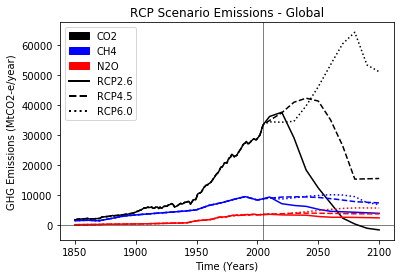

In [326]:
t26 = RCP26Ems.index[85:336]
y26 = RCP26Ems['CO2'].loc[1850:2100]
s26 = RCP26Ems['CH4'].loc[1850:2100]*28
u26 = RCP26Ems['N2O'].loc[1850:2100]*298

plt.plot(t26, y26, '-', color="black", label = 'RCP 2.6 CO2')
plt.plot(t26, s26, '-', color="blue", label = 'RCP 2.6 CH4')
plt.plot(t26, u26, '-', color="red", label = 'RCP 2.6 N2O')

# RCP45
t45 = RCP45Ems.index[85:336]
y45 = RCP45Ems['CO2'].loc[1850:2100]
s45 = RCP45Ems['CH4'].loc[1850:2100]*28
u45 = RCP45Ems['N2O'].loc[1850:2100]*298

plt.plot(t45, y45, '--', color="black", label = 'RCP 4.5 CO2')
plt.plot(t45, s45, '--', color="blue", label = 'RCP 4.5 CH4')
plt.plot(t45, u45, '--', color="red", label = 'RCP 4.5 N2O')

# RCP60
t60 = RCP60Ems.index[85:336]
y60 = RCP60Ems['CO2'].loc[1850:2100]
s60 = RCP60Ems['CH4'].loc[1850:2100]*28
u60 = RCP60Ems['N2O'].loc[1850:2100]*298

plt.plot(t60, y60, ':', color="black", label = 'RCP 6.0 CO2')
plt.plot(t60, s60, ':', color="blue", label = 'RCP 6.0 CH4')
plt.plot(t60, u60, ':', color="red", label = 'RCP 6.0 N2O')


black_patch = mpatches.Patch(color='black', label='CO2')
blue_patch = mpatches.Patch(color='blue', label='CH4')
red_patch = mpatches.Patch(color='red', label='N2O')
dots_line = Line2D([0], [0],linestyle = ':' , color='black', lw=2, label='RCP6.0')
dash_line = Line2D([0], [0],linestyle = '--' , color='black', lw=2, label='RCP4.5')
line_line = Line2D([0], [0],linestyle = '-' , color='black', lw=2, label='RCP2.6')


plt.legend(handles=[black_patch,blue_patch,red_patch,line_line,dash_line,dots_line],loc='upper left',)

plt.xlabel('Time (Years)')
plt.ylabel('GHG Emissions (MtCO2-e/year)')
plt.title('RCP Scenario Emissions - Global')

plt.axvline(x= 2005, color = 'black', linewidth=0.5)
plt.axhline(color = 'black', linewidth=0.5)


plt.savefig('Graphs/Emissions by Gas Type - Global.png', dpi=500)


### Plot of Global CO2 and CH4 Warming

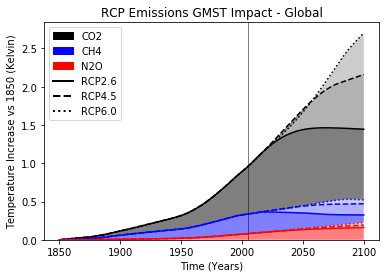

In [13]:



t26 = RCP26GIROutput['T'].index[85:336]
y26 = RCP26GIROutput['T']['Multigas'][1850:2100]
s26 = RCP26GIROutput['T']['CH4'][1850:2100] + RCP26GIROutput['T']['N2O'][1850:2100]
u26 = RCP26GIROutput['T']['N2O'][1850:2100]

# set to zero at year 1850
y26 = y26 - y26.loc[1850]
s26 = s26 - s26.loc[1850]
u26 = u26 - u26.loc[1850]

plt.plot(t26, y26, '-', color="black", label = 'RCP 2.6 CO2')
plt.plot(t26, s26, '-', color="blue", label = 'RCP 2.6 CH4')
plt.plot(t26, u26, '-', color="red", label = 'RCP 2.6 N2O')

# RCP45
t45 = RCP45GIROutput['T'].index[85:336]
y45 = RCP45GIROutput['T']['Multigas'][1850:2100]
s45 = RCP45GIROutput['T']['CH4'][1850:2100] + RCP45GIROutput['T']['N2O'][1850:2100]
u45 = RCP45GIROutput['T']['N2O'][1850:2100]

# set to zero at year 1850
y45 = y45 - y45.loc[1850]
s45 = s45 - s45.loc[1850]
u45 = u45 - u45.loc[1850]

plt.plot(t45, y45, '--', color="black", label = 'RCP 4.5 CO2')
plt.plot(t45, s45, '--', color="blue", label = 'RCP 4.5 CH4')
plt.plot(t45, u45, '--', color="red", label = 'RCP 4.5 N2O')

# RCP60
t60 = RCP60GIROutput['T'].index[85:336]
y60 = RCP60GIROutput['T']['Multigas'][1850:2100]
s60 = RCP60GIROutput['T']['CH4'][1850:2100] + RCP60GIROutput['T']['N2O'][1850:2100]
u60 = RCP60GIROutput['T']['N2O'][1850:2100]

# set to zero at year 1850
y60 = y60 - y60.loc[1850]
s60 = s60 - s60.loc[1850]
u60 = u60 - u60.loc[1850]

plt.plot(t60, y60, ':', color="black", label = 'RCP 6.0 CO2')
plt.plot(t60, s60, ':', color="blue", label = 'RCP 6.0 CH4')
plt.plot(t60, u60, ':', color="red", label = 'RCP 6.0 N2O')


 
# Stack Plotting
x=RCP26GIROutput['T'].index[85:336]

ys26 = RCP26GIROutput['T']['Multigas']['default'][1850:2100]-RCP26GIROutput['T']['CH4']['default'][1850:2100]-RCP26GIROutput['T']['N2O']['default'][1850:2100]
ss26 = RCP26GIROutput['T']['CH4']['default'][1850:2100]
us26 = RCP26GIROutput['T']['N2O']['default'][1850:2100]

ys45 = RCP45GIROutput['T']['Multigas']['default'][1850:2100]-RCP45GIROutput['T']['CH4']['default'][1850:2100]-RCP45GIROutput['T']['N2O']['default'][1850:2100]
ss45 = RCP45GIROutput['T']['CH4']['default'][1850:2100]
us45 = RCP45GIROutput['T']['N2O']['default'][1850:2100]

ys60 = RCP60GIROutput['T']['Multigas']['default'][1850:2100]-RCP60GIROutput['T']['CH4']['default'][1850:2100]-RCP60GIROutput['T']['N2O']['default'][1850:2100]
ss60 = RCP60GIROutput['T']['CH4']['default'][1850:2100]
us60 = RCP60GIROutput['T']['N2O']['default'][1850:2100]



ys26 = ys26-ys26.loc[1850]
ss26 = ss26-ss26.loc[1850]
us26 = us26-us26.loc[1850]

ys45 = ys45-ys45.loc[1850]
ss45 = ss45-ss45.loc[1850]
us45 = us45-us45.loc[1850]

ys60 = ys60-ys60.loc[1850]
ss60 = ss60-ss60.loc[1850]
us60 = us60-us60.loc[1850]

ysd26 = ys26-(us60-us26)-(ss60-ss26)
ssd26 = ss26-us60+us26
usd26 = us26

ysd45 = ys45-ys26+(us45-us26)+(ss45-ss26)
ssd45 = ss45-ss26+(us60-us45)
usd45 = us45-us26

ysd60 = ys60-ys45+(us60-us45)+(ss60-ss45)
ssd60 = ss60-ss45+(us60-us45)
usd60 = us60-us45


pal = sns.color_palette("Set1")
plt.stackplot(x,usd26,usd45,usd60,ssd26,ssd45,ssd60,ysd26,ysd45,ysd60, colors=[(1, 0.0, 0.0,0.5),(1, 0.0, 0.0,0.3),(1, 0.0, 0.0,0.2),(0, 0.0, 1,0.5),(0, 0.0, 1,0.3),(0, 0.0, 1,0.2),(0, 0.0, 0.0,0.5),(0, 0.0, 0.0,0.3),(0, 0.0, 0.0,0.2)] )
# plt.legend(loc='upper left')

plt.xlabel('Time (Years)')
plt.ylabel('Temperature Increase vs 1850 (Kelvin)')
plt.title('RCP Emissions GMST Impact - Global')

plt.axvline(x= 2005, color = 'black', linewidth=0.5)

black_patch = mpatches.Patch(color='black', label='CO2')
blue_patch = mpatches.Patch(color='blue', label='CH4')
red_patch = mpatches.Patch(color='red', label='N2O')
dots_line = Line2D([0], [0],linestyle = ':' , color='black', lw=2, label='RCP6.0')
dash_line = Line2D([0], [0],linestyle = '--' , color='black', lw=2, label='RCP4.5')
line_line = Line2D([0], [0],linestyle = '-' , color='black', lw=2, label='RCP2.6')


plt.legend(handles=[black_patch,blue_patch,red_patch,line_line,dash_line,dots_line],loc='upper left',)

plt.savefig('Graphs/Stacked Warming by Gas Type - Global.png', dpi=500)


### Methane only temperature response to RCP2.6 under each metric

In [280]:
Columns = ['Multigas','Multigas - CH4','Multigas - CH4 + CO2feEms','Multigas - CH4 + CO2we','Multigas - CH4 + Old-GWP*','Multigas - CH4 + CGWP','Multigas - CH4 + CGTP','Multigas - CH4 + GWP']

GIRRCP26DeltaEmissions = return_empty_emissions(df_to_copy=False, start_year=1765, end_year=2100, timestep=1, scen_names=[x for x in Columns], gases_in = ['CO2','CH4','N2O'])


In [281]:
# Populate input emissions table with emissions data:

GIRRCP26DeltaEmissions['Multigas','CO2'] = RCP26Emissions['CO2'] 
GIRRCP26DeltaEmissions['Multigas','CH4'] = RCP26Emissions['CH4']
GIRRCP26DeltaEmissions['Multigas','N2O'] = RCP26Emissions['N2O']

GIRRCP26DeltaEmissions['Multigas - CH4','CO2'] = RCP26Emissions['CO2'] 
GIRRCP26DeltaEmissions['Multigas - CH4','CH4'] = 0
GIRRCP26DeltaEmissions['Multigas - CH4','N2O'] = RCP26Emissions['N2O']

GIRRCP26DeltaEmissions['Multigas - CH4 + CO2feEms','CO2'] = RCP26Emissions['CO2'].add(RCP26Emissions['CO2feEms'])
GIRRCP26DeltaEmissions['Multigas - CH4 + CO2feEms','CH4'] = 0
GIRRCP26DeltaEmissions['Multigas - CH4 + CO2feEms','N2O'] = RCP26Emissions['N2O']

GIRRCP26DeltaEmissions['Multigas - CH4 + CO2we','CO2'] = RCP26Emissions['CO2'].add(RCP26Emissions['CO2we'])
GIRRCP26DeltaEmissions['Multigas - CH4 + CO2we','CH4'] = 0
GIRRCP26DeltaEmissions['Multigas - CH4 + CO2we','N2O'] = RCP26Emissions['N2O']

GIRRCP26DeltaEmissions['Multigas - CH4 + Old-GWP*','CO2'] = RCP26Emissions['CO2'].add(RCP26Emissions['Old-GWP*']) 
GIRRCP26DeltaEmissions['Multigas - CH4 + Old-GWP*','CH4'] = 0
GIRRCP26DeltaEmissions['Multigas - CH4 + Old-GWP*','N2O'] = RCP26Emissions['N2O']

GIRRCP26DeltaEmissions['Multigas - CH4 + CGWP','CO2'] = RCP26Emissions['CO2'].add(RCP26Emissions['CGWP'])
GIRRCP26DeltaEmissions['Multigas - CH4 + CGWP','CH4'] = 0
GIRRCP26DeltaEmissions['Multigas - CH4 + CGWP','N2O'] = RCP26Emissions['N2O']

GIRRCP26DeltaEmissions['Multigas - CH4 + CGTP','CO2'] = RCP26Emissions['CO2'].add(RCP26Emissions['CGTP'])
GIRRCP26DeltaEmissions['Multigas - CH4 + CGTP','CH4'] = 0
GIRRCP26DeltaEmissions['Multigas - CH4 + CGTP','N2O'] = RCP26Emissions['N2O']

GIRRCP26DeltaEmissions['Multigas - CH4 + GWP','CO2'] = RCP26Emissions['CO2'].add(RCP26Emissions['GWP'])
GIRRCP26DeltaEmissions['Multigas - CH4 + GWP','CH4'] = 0
GIRRCP26DeltaEmissions['Multigas - CH4 + GWP','N2O'] = RCP26Emissions['N2O']

In [282]:
RCP26DeltaGIROutput = run_GIR(emissions_in=GIRRCP26DeltaEmissions)

Integrating 8 scenarios, 1 gas cycle parameter sets, 1 independent thermal response parameter sets, over ['CH4', 'CO2', 'N2O'], between 1765.0 and 2100.0...


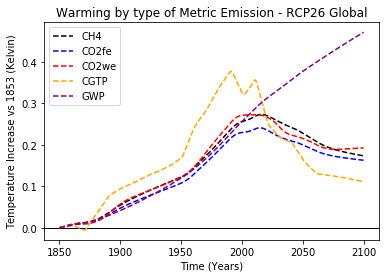

CO2fe RMSDeviation: Parameter set
default    0.023904
dtype: float64
CO2we RMSDeviation: Parameter set
default    0.010603
dtype: float64
OldGWP* RMSDeviation: Parameter set
default    0.070516
dtype: float64
CGWP RMSDeviation: Parameter set
default    0.105077
dtype: float64
CGTP RMSDeviation: Parameter set
default    0.079353
dtype: float64
GWP RMSDeviation: Parameter set
default    0.137125
dtype: float64


In [283]:
# Plot of emission driven warming, Multigas vs Metric: UK

t = RCP26DeltaGIROutput['T'].index[85:336]
y = RCP26DeltaGIROutput['T']['Multigas'][1850:2100] - RCP26DeltaGIROutput['T']['Multigas'].loc[1850]
s = RCP26DeltaGIROutput['T']['Multigas - CH4 + CO2feEms'][1850:2100] - RCP26DeltaGIROutput['T']['Multigas - CH4 + CO2feEms'].loc[1850]
u = RCP26DeltaGIROutput['T']['Multigas - CH4 + CO2we'][1850:2100] - RCP26DeltaGIROutput['T']['Multigas - CH4 + CO2we'].loc[1850]
v = RCP26DeltaGIROutput['T']['Multigas - CH4 + Old-GWP*'][1850:2100] - RCP26DeltaGIROutput['T']['Multigas - CH4 + Old-GWP*'].loc[1850]
w = RCP26DeltaGIROutput['T']['Multigas - CH4 + CGWP'][1850:2100] - RCP26DeltaGIROutput['T']['Multigas - CH4 + CGWP'].loc[1850]
z = RCP26DeltaGIROutput['T']['Multigas - CH4 + CGTP'][1850:2100] - RCP26DeltaGIROutput['T']['Multigas - CH4 + CGTP'].loc[1850]
x = RCP26DeltaGIROutput['T']['Multigas - CH4 + GWP'][1850:2100] - RCP26DeltaGIROutput['T']['Multigas - CH4 + GWP'].loc[1850]

l = RCP26DeltaGIROutput['T']['Multigas - CH4'][1850:2100] - RCP26DeltaGIROutput['T']['Multigas - CH4'].loc[1850]

y = y - l
s = s - l
u = u - l
v = v - l
w = w - l
z = z - l
x = x - l




fig, (ax) = plt.subplots()
ax.axhline(linewidth=1,color='black')


ax.set(xlabel='Time (Years)', ylabel='Temperature Increase vs 1853 (Kelvin)',
       title='Warming by type of Metric Emission - RCP26 Global')
# ax.grid()

# red_patch = mpatches.Patch(color='red', label='Agriculture')
# plt.legend(handles=[red_patch])

plt.plot(t, y, '--', color="black", label = 'CH4')
plt.plot(t, s, '--', color="blue", label = 'CO2fe')
plt.plot(t, u, '--', color="red", label = 'CO2we')
# plt.plot(t, v, '--', color="green", label = 'OldGWP*')
# plt.plot(t, w, '--', color="orange", label = 'CGWP')
plt.plot(t, z, '--', color="orange", label = 'CGTP')
plt.plot(t, x, '--', color="purple", label = 'GWP')

ax.legend()

plt.show()

sDiff = s - y
uDiff = u - y
vDiff = v - y
wDiff = w - y
zDiff = z - y
xDiff = x - y

sRMS = np.sqrt((sDiff**2).sum(axis = 0, skipna = True)/(2017-1850))
uRMS = np.sqrt((uDiff**2).sum(axis = 0, skipna = True)/(2017-1850))
vRMS = np.sqrt((vDiff**2).sum(axis = 0, skipna = True)/(2017-1850))
wRMS = np.sqrt((wDiff**2).sum(axis = 0, skipna = True)/(2017-1850))
zRMS = np.sqrt((zDiff**2).sum(axis = 0, skipna = True)/(2017-1850))
xRMS = np.sqrt((xDiff**2).sum(axis = 0, skipna = True)/(2017-1850))

print('CO2fe RMSDeviation:', sRMS)
print('CO2we RMSDeviation:', uRMS)
print('OldGWP* RMSDeviation:', vRMS)
print('CGWP RMSDeviation:', wRMS)
print('CGTP RMSDeviation:', zRMS)
print('GWP RMSDeviation:', xRMS)

# How constant is Radiative efficiency / how good is the linearity assumption?
1. Get CO2 concentrations given the multigas run:
2. Plot logarithmic RE relation from AR5 as a function of time (years) and concentration ([CO2])

In [284]:
Columns = ['Multigas']
GIRGlobalEmsConc = return_empty_emissions(df_to_copy=False, start_year=1600, end_year=2017, timestep=1, scen_names=[x for x in Columns], gases_in = ['CO2','CH4','N2O'])
GIRGlobalEmsConc['Multigas','CO2'] = GlobalEms['CO2'] 
GIRGlobalEmsConc['Multigas','CH4'] = GlobalEms['CH4']
GIRGlobalEmsConc['Multigas','N2O'] = GlobalEms['N2O']
GlobalEmsConcGIROutput = run_GIR(emissions_in=GIRGlobalEmsConc)

Integrating 1 scenarios, 1 gas cycle parameter sets, 1 independent thermal response parameter sets, over ['CH4', 'CO2', 'N2O'], between 1600.0 and 2017.0...


## Using the AR5 dependence:

In [285]:
# Using values from AR5 Chapt8 Supplementary Material: 8.SM.3, Table 8.SM.1

# I should attempt to find all these values in AR5 documentation
PIConcCO2 = 278*K #ppb
PIConcCH4 = 720 #ppb    
PIConcN2O = 271.258 #ppb  

PDConcCO2 = 368.824503*K #ppb
PDConcCH4 = 1766.937240 #ppb    
PDConcN2O = 327.220201 #ppb  

AlphaCO2 = 5.35    
AlphaCH4 = 0.036 
AlphaN2O = 0.12 

ConcCO2 = GlobalEmsConcGIROutput['C']['Multigas','default']['CO2']*K
ConcCH4 = GlobalEmsConcGIROutput['C']['Multigas','default']['CH4']
ConcN2O = GlobalEmsConcGIROutput['C']['Multigas','default']['N2O']

# f (M , N) = 0.47 ln [1+2.01×10–5 (MN)0.75 + 5.31×10–15 M (MN)1.52]
Delta = 1

def f(M,N):
    return 0.47*np.log(1 + 2.01e-5*(M*N)**0.75 + 5.31e-15*M*(M*N)**1.52)
    
    

RFCO2 = AlphaCO2*np.log(ConcCO2/PIConcCO2)
RFCH4 = AlphaCH4*(np.sqrt(ConcCH4)-np.sqrt(PIConcCH4))-f(ConcCH4,PDConcN2O)+f(PIConcCH4,PDConcN2O)
RFN2O = AlphaN2O*(np.sqrt(ConcN2O-np.sqrt(PIConcN2O)))-f(PDConcCH4,ConcN2O)+f(PDConcCH4,PIConcN2O)

RFDCO2 = AlphaCO2*np.log((ConcCO2+Delta)/PIConcCO2)
RFDCH4 = AlphaCH4*(np.sqrt(ConcCH4+Delta)-np.sqrt(PIConcCH4))-f(ConcCH4+Delta,PDConcN2O)+f(PIConcCH4,PDConcN2O)
RFDN2O = AlphaN2O*(np.sqrt(ConcN2O+Delta)-np.sqrt(PIConcN2O))-f(PDConcCH4,ConcN2O+Delta)+f(PDConcCH4,PIConcN2O)


DeltaRFCO2 = (RFDCO2 - RFCO2)
DeltaRFCH4 = 1.65*(RFDCH4 - RFCH4)
DeltaRFN2O = 0.93*(RFDN2O - RFN2O)

Ratio = DeltaRFCH4/DeltaRFCO2

Convch4 = 0.351714258
Convco2 = 0.127867033
REch4  = 1.65*0.000363
REco2 = 0.0000137

Gamma = (DeltaRFCH4*Convch4)/(DeltaRFCO2*Convco2)

ConstGamma = (Convch4*REch4)/(Convco2*REco2)

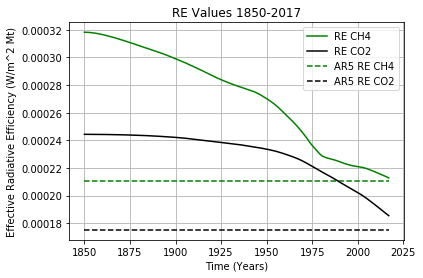

In [333]:
# Effective Radiative Efficiency (W/m^2 Mt) plotting

# Gamma plotting
fig, (ax) = plt.subplots()


ax.set(xlabel='Time (Years)', ylabel='Effective Radiative Efficiency (W/m^2 Mt)',
       title='RE Values 1850-2017')
ax.grid()

# red_patch = mpatches.Patch(color='red', label='Agriculture')
# plt.legend(handles=[red_patch])
t = GlobalEmsConcGIROutput['C']['Multigas','default']['CO2'].index[250:418]
y = DeltaRFCH4*Convch4
v = 100*DeltaRFCO2*Convco2


plt.plot(t, y[1850:2017], color="green", label = 'RE CH4')
plt.plot(t, v[1850:2017], color="black", label = 'RE CO2')

plt.hlines(Convch4*REch4,1850,2017,colors="green",linestyle = "--", label = 'AR5 RE CH4')
plt.hlines(100*Convco2*REco2,1850,2017,colors="black",linestyle = "--", label = 'AR5 RE CO2')


ax.legend()

plt.savefig('Graphs/EREVariation.png', dpi=500)

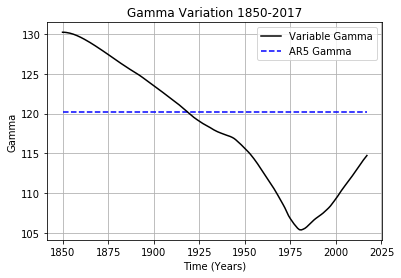

In [334]:
# Gamma plotting
fig, (ax) = plt.subplots()


ax.set(xlabel='Time (Years)', ylabel='Gamma',
       title='Gamma Variation 1850-2017')
ax.grid()

# red_patch = mpatches.Patch(color='red', label='Agriculture')
# plt.legend(handles=[red_patch])
y = Gamma[1850:2017]


plt.plot(t, y, color="black", label = 'Variable Gamma')
plt.hlines(ConstGamma,1850,2017,colors="blue",linestyle = "--", label = 'AR5 Gamma')


ax.legend()

plt.savefig('Graphs/GammaVariation.png', dpi=500)

In [300]:
print(Gamma[1850])
print(Gamma[1981])

130.232920618099
105.38487954751245


# 3 Part Figure for CH4 step change

In [289]:
Columns = ['CH4','CO2feEms','CO2we','Old-GWP*','CGWP','CGTP','GWP']

GIRStepTestEms = return_empty_emissions(df_to_copy=False, start_year=-50, end_year=150, timestep=1, scen_names=[x for x in Columns], gases_in = ['CO2','CH4','N2O'])

In [290]:
# Set Data in Input:

    
GIRStepTestEms['CH4','CO2'] = 0 
GIRStepTestEms['CH4','CH4'] = StepTestEms['SLCP Emissions']
GIRStepTestEms['CH4','N2O'] = 0

GIRStepTestEms['CO2feEms','CO2'] = StepTestEms['CO2feEms']
GIRStepTestEms['CO2feEms','CH4'] = 0
GIRStepTestEms['CO2feEms','N2O'] = 0

GIRStepTestEms['CO2we','CO2'] = StepTestEms['CO2we']
GIRStepTestEms['CO2we','CH4'] = 0
GIRStepTestEms['CO2we','N2O'] = 0

GIRStepTestEms['Old-GWP*','CO2'] = StepTestEms['Old-GWP*']
GIRStepTestEms['Old-GWP*','CH4'] = 0
GIRStepTestEms['Old-GWP*','N2O'] = 0

GIRStepTestEms['CGWP','CO2'] = StepTestEms['CGWP']
GIRStepTestEms['CGWP','CH4'] = 0
GIRStepTestEms['CGWP','N2O'] = 0

GIRStepTestEms['CGTP','CO2'] = StepTestEms['CGTP']
GIRStepTestEms['CGTP','CH4'] = 0
GIRStepTestEms['CGTP','N2O'] = 0

GIRStepTestEms['GWP','CO2'] = StepTestEms['GWP']
GIRStepTestEms['GWP','CH4'] = 0
GIRStepTestEms['GWP','N2O'] = 0

In [291]:
# Define AR5 Gas Parameters

AR5GasParameters = get_gas_parameter_defaults()

AR5GasParameters.loc['r0':'rA'] = 0
AR5GasParameters.loc['f1':'f3'] = 0

tau = AR5GasParameters.loc['tau1':'tau4'].values.T
a = AR5GasParameters.loc['a1':'a4'].values.T

g1 = np.sum( a * tau * ( 1. - ( 1. + 100/tau ) * np.exp(-100/tau) ), axis=-1 )
g0 = ( np.sinh( np.sum( a * tau * ( 1. - np.exp(-100/tau) ) , axis=-1) / g1 ) )**(-1.)

AR5GasParameters.loc['r0'] = g1*np.arcsinh(1/g0)
AR5GasParameters.loc['r0']['default','CO2'] = AR5GasParameters.loc['r0']['default','CO2']-2.8

AR5GasParameters.loc['PI_conc'] = [391,1803,324]
AR5GasParameters.loc['emis2conc'] = [0.1282494302*44.0095/12.0107,0.3518275392,0.200980]
AR5GasParameters.loc['f2'] = [1000*1.37e-5 , 1.65 * 3.63e-4 , ( 1 - 0.36*1.65*( 3.63e-4/3.00e-3 ) ) * 3.00e-3]
AR5GasParameters

default                         
Gas                    CO2          CH4         N2O
param_name                                         
a1                0.217300     1.000000    1.000000
a2                0.224000     0.000000    0.000000
a3                0.282400     0.000000    0.000000
a4                0.276300     0.000000    0.000000
tau1        1000000.000000     9.150000  116.000000
tau2            394.400000     1.000000    1.000000
tau3             36.540000     1.000000    1.000000
tau4              4.304000     1.000000    1.000000
r0               49.554302     9.149836   67.014652
rC                0.000000     0.000000    0.000000
rT                0.000000     0.000000    0.000000
rA                0.000000     0.000000    0.000000
PI_conc         391.000000  1803.000000  324.000000
emis2conc         0.469930     0.351828    0.200980
f1                0.000000     0.000000    0.000000
f2                0.013700     0.000599    0.002784
f3                0.000000     0.000000    0.000000

In [292]:
# Define AR5 Thermal Parameters

AR5ThermalParameters = get_thermal_parameter_defaults()
AR5ThermalParameters

Thermal_param_set     default                 
Box                         1         2      3
param_name                                    
d                  283.000000  9.880000  0.850
q                    0.311333  0.165417  0.242

In [293]:
StepTestEmsGIROutput = run_GIR(emissions_in=GIRStepTestEms,gas_parameters=AR5GasParameters,thermal_parameters=AR5ThermalParameters)

Integrating 7 scenarios, 1 gas cycle parameter sets, 1 independent thermal response parameter sets, over ['CH4', 'CO2', 'N2O'], between -50.0 and 150.0...


### Emissions

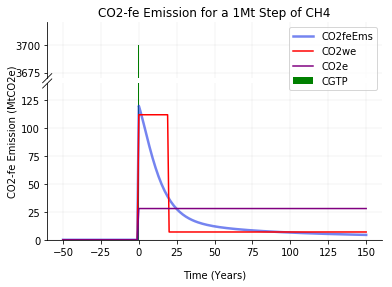

In [294]:
t = UnconvertedStepTestEms.index
s = UnconvertedStepTestEms['CO2feEms']
u = UnconvertedStepTestEms['CO2we']
v = UnconvertedStepTestEms['CGTP']
x = UnconvertedStepTestEms['GWP']

fig = plt.figure()
bax = brokenaxes(ylims=((0, 140), (3670, 3720)), hspace=.05)
bax.plot(t, s, color = (0.1, 0.2, 0.9, 0.6), linewidth = 2.5)
bax.plot(t, u, color = "red", label='CO2we')
bax.bar(t, v, color = "green", label='CGTP')
bax.plot(t, x, color = "purple", label='CO2e')


bax.set_xlabel('Time (Years)')
bax.set_ylabel('CO2-fe Emission (MtCO2e)')
bax.set_title('CO2-fe Emission for a 1Mt Step of CH4')
bax.axhline(linewidth=1,color='black')
# bax.axvline(linewidth=1,color='black')

bax.grid(color=(0, 0, 0, 0.3), linestyle='-', linewidth=0.05)
bax.legend()

plt.savefig('Graphs/CO2 Equivalent Emissions for CH4 Step', dpi=1000)

### Concentration

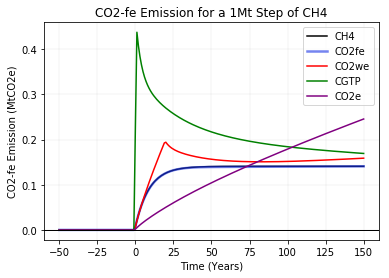

<Figure size 432x288 with 0 Axes>

In [295]:
t = StepTestEmsGIROutput['C']['CH4'].index
c = (StepTestEmsGIROutput['C']['CH4']['default']['CH4'] - AR5GasParameters.loc['PI_conc']['default']['CH4'])*(0.000599/(1000*1.37e-5))
s = StepTestEmsGIROutput['C']['CO2feEms']['default']['CO2'] - AR5GasParameters.loc['PI_conc']['default']['CO2']
u = StepTestEmsGIROutput['C']['CO2we']['default']['CO2'] - AR5GasParameters.loc['PI_conc']['default']['CO2']
v = StepTestEmsGIROutput['C']['CGTP']['default']['CO2'] - AR5GasParameters.loc['PI_conc']['default']['CO2']
x = StepTestEmsGIROutput['C']['GWP']['default']['CO2'] - AR5GasParameters.loc['PI_conc']['default']['CO2']

fig, (bax) = plt.subplots()
# bax = brokenaxes(ylims=((0, 140)), hspace=.05)
bax.plot(t, c, color = "black", label='CH4')
bax.plot(t, s, color = (0.1, 0.2, 0.9, 0.6), linewidth = 2.5, label='CO2fe')
bax.plot(t, u, color = "red", label='CO2we')
bax.plot(t, v, color = "green", label='CGTP')
bax.plot(t, x, color = "purple", label='CO2e')


bax.set_xlabel('Time (Years)')
bax.set_ylabel('CO2-fe Emission (MtCO2e)')
bax.set_title('CO2-fe Emission for a 1Mt Step of CH4')
bax.axhline(linewidth=1,color='black')
# bax.axvline(linewidth=1,color='black')

bax.grid(color=(0, 0, 0, 0.3), linestyle='-', linewidth=0.05)
bax.legend()

plt.show()

plt.savefig('Graphs/CO2 Equivalent Forcing for CH4 Step', dpi=1000)

### Warming

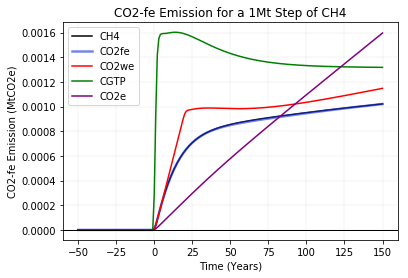

In [296]:
t = StepTestEmsGIROutput['T']['CH4'].index
c = StepTestEmsGIROutput['T']['CH4']
s = StepTestEmsGIROutput['T']['CO2feEms']
u = StepTestEmsGIROutput['T']['CO2we']
v = StepTestEmsGIROutput['T']['CGTP']
x = StepTestEmsGIROutput['T']['GWP']

fig, (bax) = plt.subplots()
# bax = brokenaxes(ylims=((0, 140)), hspace=.05)
bax.plot(t, c, color = "black", label='CH4')
bax.plot(t, s, color = (0.1, 0.2, 0.9, 0.6), linewidth = 2.5, label='CO2fe')
bax.plot(t, u, color = "red", label='CO2we')
bax.plot(t, v, color = "green", label='CGTP')
bax.plot(t, x, color = "purple", label='CO2e')




bax.set_xlabel('Time (Years)')
bax.set_ylabel('CO2-fe Emission (MtCO2e)')
bax.set_title('CO2-fe Emission for a 1Mt Step of CH4')
bax.axhline(linewidth=1,color='black')
# bax.axvline(linewidth=1,color='black')

bax.grid(color=(0, 0, 0, 0.3), linestyle='-', linewidth=0.05)
bax.legend()

plt.savefig('Graphs/CO2 Equivalent Warming for CH4 Step', dpi=1000)

### Combined Graph

/Users/student/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2317: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "
/Users/student/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2317: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "
/Users/student/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2317: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called 

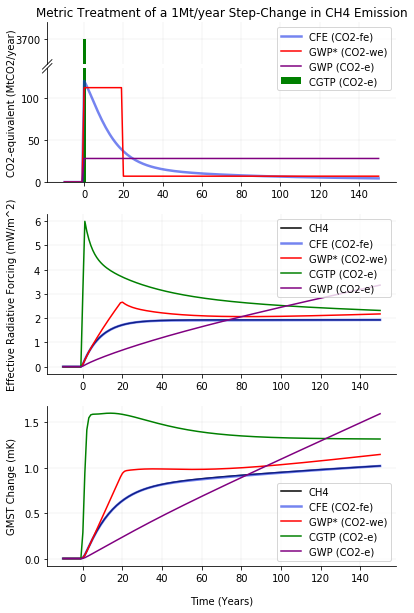

In [332]:
# fig, (ax1,ax2,ax3) = plt.subplots(3)
fig = plt.figure(constrained_layout=True)
sax1,sax2,sax3 = GridSpec(3,1)
# plt.rcParams["figure.figsize"] = (20,10)

fig.set_figheight(10)
fig.set_figwidth(6.25)

# Emissions
t = UnconvertedStepTestEms.index[40:201]
s = UnconvertedStepTestEms['CO2feEms']
u = UnconvertedStepTestEms['CO2we']
v = UnconvertedStepTestEms['CGTP']
x = UnconvertedStepTestEms['GWP']

ax1 = brokenaxes(ylims=((0, 135), (3670, 3720)), hspace=.05, subplot_spec=sax1)
ax1.plot(t, s[40:201], color = (0.1, 0.2, 0.9, 0.6), linewidth = 2.5, label='CFE (CO2-fe)')
ax1.plot(t, u[40:201], color = "red", label='GWP* (CO2-we)')
ax1.bar(t, v[40:201], color = "green", width=1.5, label='CGTP (CO2-e)')
ax1.plot(t, x[40:201], color = "purple", label='GWP (CO2-e)')

# ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('CO2-equivalent (MtCO2/year)')
ax1.set_title('Metric Treatment of a 1Mt/year Step-Change in CH4 Emission')
# ax1.axhline(linewidth=1,color='black')

ax1.grid(color=(0, 0, 0, 0.3), linestyle='-', linewidth=0.05)
ax1.legend()

# Forcing
t1 = StepTestEmsGIROutput['C']['CH4'].index[40:201]
c1 = ((StepTestEmsGIROutput['C']['CH4']['default']['CH4'] - AR5GasParameters.loc['PI_conc']['default']['CH4'])*0.000599)*1000
s1 = ((StepTestEmsGIROutput['C']['CO2feEms']['default']['CO2'] - AR5GasParameters.loc['PI_conc']['default']['CO2'])*1000*1.37e-5)*1000
u1 = ((StepTestEmsGIROutput['C']['CO2we']['default']['CO2'] - AR5GasParameters.loc['PI_conc']['default']['CO2'])*1000*1.37e-5)*1000
v1 = ((StepTestEmsGIROutput['C']['CGTP']['default']['CO2'] - AR5GasParameters.loc['PI_conc']['default']['CO2'])*1000*1.37e-5)*1000
x1 = ((StepTestEmsGIROutput['C']['GWP']['default']['CO2'] - AR5GasParameters.loc['PI_conc']['default']['CO2'])*1000*1.37e-5)*1000

ax2 = brokenaxes(subplot_spec=sax2)
ax2.plot(t1, c1[-10:150], color = "black", label='CH4')
ax2.plot(t1, s1[-10:150], color = (0.1, 0.2, 0.9, 0.6), linewidth = 2.5, label='CFE (CO2-fe)')
ax2.plot(t1, u1[-10:150], color = "red", label='GWP* (CO2-we)')
ax2.plot(t1, v1[-10:150], color = "green", label='CGTP (CO2-e)')
ax2.plot(t1, x1[-10:150], color = "purple", label='GWP (CO2-e)')

# ax2.set_xlabel('Time (Years)')
ax2.set_ylabel('Effective Radiative Forcing (mW/m^2)')
# ax2.set_title('CO2-fe Emission for a 1Mt Step of CH4')
# ax2.axhline(linewidth=1,color='black')

ax2.grid(color=(0, 0, 0, 0.3), linestyle='-', linewidth=0.05)
ax2.legend()

# Warming
t1 = StepTestEmsGIROutput['T']['CH4'].index[40:201]
c1 = StepTestEmsGIROutput['T']['CH4'][-10:150]*1000
s1 = StepTestEmsGIROutput['T']['CO2feEms'][-10:150]*1000
u1 = StepTestEmsGIROutput['T']['CO2we'][-10:150]*1000
v1 = StepTestEmsGIROutput['T']['CGTP'][-10:150]*1000
x1 = StepTestEmsGIROutput['T']['GWP'][-10:150]*1000

ax3 = brokenaxes(subplot_spec=sax3)
ax3.plot(t1, c1, color = "black", label='CH4')
ax3.plot(t1, s1, color = (0.1, 0.2, 0.9, 0.6), linewidth = 2.5, label='CFE (CO2-fe)')
ax3.plot(t1, u1, color = "red", label='GWP* (CO2-we)')
ax3.plot(t1, v1, color = "green", label='CGTP (CO2-e)')
ax3.plot(t1, x1, color = "purple", label='GWP (CO2-e)')




ax3.set_xlabel('Time (Years)')
ax3.set_ylabel('GMST Change (mK)')
# ax3.set_title('CO2-fe Emission for a 1Mt Step of CH4')
# ax2.axhline(linewidth=1,color='black')

ax3.grid(color=(0, 0, 0, 0.3), linestyle='-', linewidth=0.05)
ax3.legend(loc = 'lower right')

plt.savefig('Graphs/CO2 Equivalent Combined for CH4 Step', dpi=1000)

